In [4]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [8]:
# loading the data from a csv file to a panda data frame
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [9]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
insurance_dataset.shape

(1338, 7)

In [11]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Figures: Sex, Smoker,Region

In [13]:


insurance_dataset = pd.read_csv('/content/insurance.csv')
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Data Analysis



In [ ]:
insurance_dataset.describe()

<Figure size 300x300 with 0 Axes>

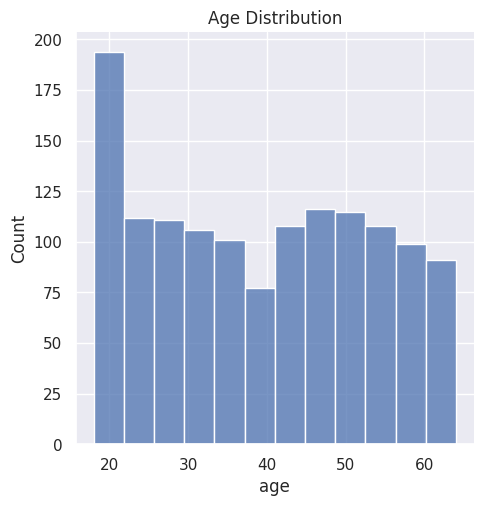

In [14]:
sns.set()
plt.figure(figsize= (3,3))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

Gener Wise Dist

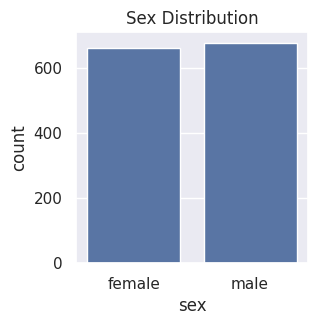

In [16]:

plt.figure(figsize = (3,3))
sns.countplot(x= 'sex', data = insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [17]:
insurance_dataset['sex'].value_counts()  #as u can see the male and female distribution are almost equal

,count
sex,
male,676
female,662


<Figure size 300x300 with 0 Axes>

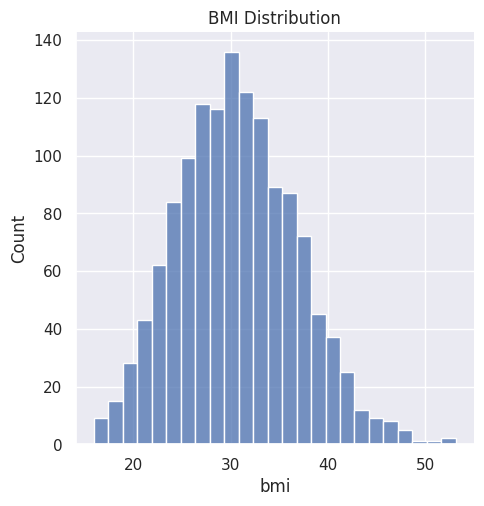

In [18]:
#BMI Distribution
plt.figure(figsize = (3,3))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range = 18.5 to 24
From the abvove graph we can say that many persons are overweight

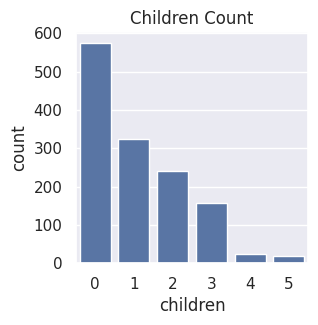

In [19]:
#Children Figure
plt.figure(figsize= (3,3))
sns.countplot(x= 'children', data= insurance_dataset)
plt.title('Children Count')
plt.show()

In [20]:
insurance_dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


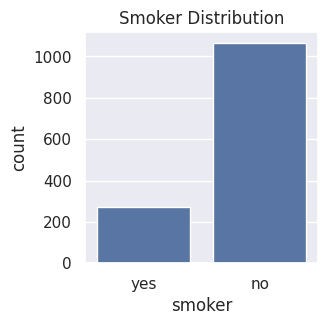

In [21]:
#Smoker Distribution
plt.figure(figsize = (3,3))

sns.countplot(x = 'smoker', data= insurance_dataset)
plt.title('Smoker Distribution')
plt.show()

In [22]:
insurance_dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


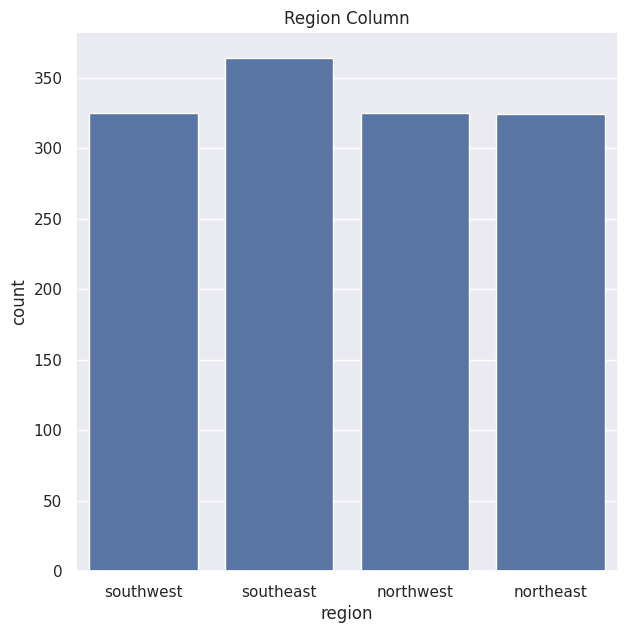

In [23]:
# REGION Column

plt.figure(figsize= (7,7))
sns.countplot(x = 'region', data = insurance_dataset)
plt.title('Region Column')
plt.show()

Hence we, see the southeast region shows the

In [24]:
insurance_dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


/tmp/ipython-input-3065513741.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


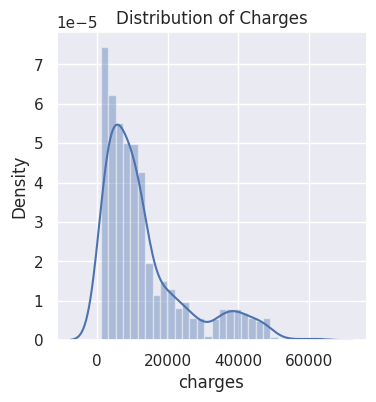

In [25]:
 plt.figure(figsize=(4,4))
 sns.distplot(insurance_dataset['charges'])
 plt.title('Distribution of Charges')
 plt.show()


Data Pre-Processing

In [26]:
#encoding sex column data ko encode kiya hai taki so that we can process them effectively

insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
insurance_dataset.replace({'smoker' : {'yes' :1, 'no' :0 }}, inplace=True)
insurance_dataset.replace({'region': {'southeast': 1, 'southwest': 2, 'northeast' :3, 'northwest': 4}}, inplace= True)
insurance_dataset.head(20)

/tmp/ipython-input-519127372.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
/tmp/ipython-input-519127372.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker' : {'yes' :1, 'no' :0 }}, inplace=True)
/tmp/ipython-input-519127372.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in 

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,4,21984.47061
4,32,0,28.880,0,0,4,3866.85520
5,31,1,25.740,0,0,1,3756.62160
6,46,1,33.440,1,0,1,8240.58960
7,37,1,27.740,3,0,4,7281.50560
8,37,0,29.830,2,0,3,6406.41070
9,60,1,25.840,0,0,4,28923.13692


Split the features and targets

In [27]:
X = insurance_dataset.drop(columns = 'charges', axis = 1)
Y = insurance_dataset['charges']
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       2
1      18    0  33.770         1       0       1
2      28    0  33.000         3       0       1
3      33    0  22.705         0       0       4
4      32    0  28.880         0       0       4
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       4
1334   18    1  31.920         0       0       3
1335   18    1  36.850         0       0       1
1336   21    1  25.800         0       0       2
1337   61    1  29.070         0       1       4

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training data and Testing data

In [28]:
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state = 2)
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


MODEL TRAINING

In [29]:
#Loading the linear Reggression model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

MODEL EVALUATION


In [30]:
#prediction on training data
training_data_prediction = regressor.predict(X_train)

In [31]:
# R squared value

r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R square values is : ', r2_train)


R square values is :  0.751505643411174


In [32]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R square is : ', r2_test)

R square is :  0.7447273869684076


Building a Predictive System

In [34]:
import numpy as np

input_data = (24,1,26.6,0,0,3) #this is a tuple array we need to change it to numpy
input_data_as_numpy_array = np.asarray(input_data)
#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)


print('The prediction cost is USD: ', prediction[0])

[2709.0454569]
The prediction cost is USD:  2709.045456897391


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
import pickle
pickle.dump(regressor, open('insurance_model.pkl','wb'))